# Homework 4 : Logistic regression for student grades (scikit-learn, Machine Learning)

#4108056018 資工三 王旻玄
<img src="https://raw.githubusercontent.com/michael54856/AIOT_hw5/main/skiLearnLogo.png" height=300>


步驟:
1. Step 1: 與Google Drive連結 (上傳檔案)
2. Step 2: Import library, 匯入檔案
3. Step 3: 資料預處理
4. Step 4: 建置與訓練Model
5. Step 5: 測試Model
6. Step 6: 儲存Model
7. Step 7: 使用儲存的Model來預測




# **Step 1: 與Google Drive連結 (上傳檔案)**

**請先上傳 grades.csv 與 predict.csv 到自己的雲端硬碟上！**

In [ ]:
#連結Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Step 2: Import library, 匯入檔案**

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import data
data=pd.read_csv("/content/drive/My Drive/grades.csv")

#輸出檔案的資訊
print(data.head()) # show first 5 items
print(data.info())
print(data.describe())


   id  chinese  english  math  pass
0   1       26       16    31     0
1   2        9       71    20     0
2   3       75       44    59     0
3   4       36       16    62     0
4   5       40       65    36     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       208 non-null    int64
 1   chinese  208 non-null    int64
 2   english  208 non-null    int64
 3   math     208 non-null    int64
 4   pass     208 non-null    int64
dtypes: int64(5)
memory usage: 8.2 KB
None
               id     chinese     english        math        pass
count  208.000000  208.000000  208.000000  208.000000  208.000000
mean   104.500000   48.740385   48.100962   51.317308    0.336538
std     60.188592   28.867512   27.677131   27.970227    0.473665
min      1.000000    1.000000    0.000000    0.000000    0.000000
25%     52.750000   26.000000   25.000000   28.000000  

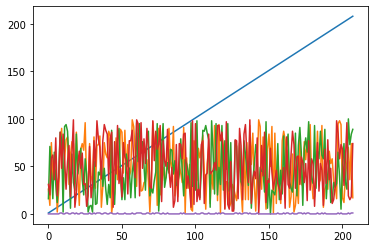

In [ ]:
plt.plot(data)

# **Step 3: 資料預處理**
* 擷取出訓練的資料(chinese,english,math)
* 將資料切割,90%為訓練資料,10%為驗證資料
* 將資料轉換成轉換成numpy format


In [ ]:
data.columns
X=data[['chinese','english','math']]
Y=data[['pass']]
X=X.to_numpy()
Y=Y.to_numpy()

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, random_state=777, train_size=0.9) #90%為train, 10%為test

print(type(X_train),X_train.shape, type(Y_train), Y_train.shape)
print(type(X_test),X_test.shape, type(Y_test), Y_test.shape)


<class 'numpy.ndarray'> (187, 3) <class 'numpy.ndarray'> (187, 1)
<class 'numpy.ndarray'> (21, 3) <class 'numpy.ndarray'> (21, 1)


# **Step 4: 建置與訓練Model**

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
model=LR()  # constructor
model.fit(X_train,Y_train) # training

print(model) 
print("a*=",model.coef_[0],"b*=",model.intercept_ )


LogisticRegression()
a*= [0.08015157 0.0831288  0.0992329 ] b*= [-15.2520254]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Step 5: 測試Model**

對切割的資料進行驗證:

In [ ]:
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import classification_report

#與切割的train data進行驗證
yPred=model.predict(X_train)
print(classification_report(Y_train, yPred))
print("MSE=",MSE(Y_train,yPred))
print("R2=",R2(Y_train,yPred))
for i,thisData in enumerate(yPred):
  print(f'grade: {X_train[i]}, real pass: {Y_train[i]}, predict pass: {yPred[i]}')


              precision    recall  f1-score   support

           0       0.92      0.91      0.92       126
           1       0.82      0.84      0.83        61

    accuracy                           0.89       187
   macro avg       0.87      0.87      0.87       187
weighted avg       0.89      0.89      0.89       187

MSE= 0.11229946524064172
R2= 0.4890710382513661
grade: [35 28 56], real pass: [0], predict pass: 0
grade: [73 50 21], real pass: [0], predict pass: 0
grade: [21 10 76], real pass: [0], predict pass: 0
grade: [17 52 68], real pass: [0], predict pass: 0
grade: [85 35 36], real pass: [0], predict pass: 0
grade: [32 28 29], real pass: [0], predict pass: 0
grade: [99 43 88], real pass: [1], predict pass: 1
grade: [90  3 73], real pass: [1], predict pass: 0
grade: [84 37 33], real pass: [0], predict pass: 0
grade: [18 93  8], real pass: [0], predict pass: 0
grade: [81 87 55], real pass: [1], predict pass: 1
grade: [52 27 28], real pass: [0], predict pass: 0
grade: [46 87

In [ ]:
#與切割的test data進行驗證
yPred_test=model.predict(X_test)
print(classification_report(Y_test, yPred_test))
print("MSE=",MSE(Y_test,yPred_test))
print("R2=",R2(Y_test,yPred_test))
for i,thisData in enumerate(yPred_test):
  print(f'grade: {X_test[i]}, real pass: {Y_test[i]}, predict pass: {yPred_test[i]}')

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.78      0.78      0.78         9

    accuracy                           0.81        21
   macro avg       0.81      0.81      0.81        21
weighted avg       0.81      0.81      0.81        21

MSE= 0.19047619047619047
R2= 0.2222222222222221
grade: [75 45 61], real pass: [1], predict pass: 1
grade: [74 84 18], real pass: [1], predict pass: 0
grade: [78 94 26], real pass: [1], predict pass: 1
grade: [35 98 13], real pass: [0], predict pass: 0
grade: [ 3 29 98], real pass: [0], predict pass: 0
grade: [65 44 87], real pass: [1], predict pass: 1
grade: [93 80 99], real pass: [1], predict pass: 1
grade: [80 95 46], real pass: [1], predict pass: 1
grade: [28 42  8], real pass: [0], predict pass: 0
grade: [94 53 25], real pass: [0], predict pass: 0
grade: [39 23 16], real pass: [0], predict pass: 0
grade: [36 73 15], real pass: [0], predict pass: 0
grade: [32 71

對prediction.csv的資料進行預測(用剛訓練好的model進行預測):

In [ ]:
#也可以選擇直接儲存Model,之後再預測

#訓練好後預測predict.csv
predictData=pd.read_csv("/content/drive/My Drive/predict.csv")
predictData.columns
predictX=predictData[['chinese','english','math']]
predictX=predictX.to_numpy()

print(predictX.shape)

#如果有2科60分以上那麼就是pass,先算出每個人是否pass來當驗證的資料
verifyY = np.zeros((predictX.shape[0], 1))

print(verifyY.shape)

for i,dummy in enumerate(verifyY):
  passCount = 0
  if predictX[i][0] >= 60:
      passCount+=1
  if predictX[i][1] >= 60:
      passCount+=1
  if predictX[i][2] >= 60:
      passCount+=1
  if passCount >= 2:
    verifyY[i] = 1

#用剛剛訓練好的模型去預測,並查看結果
predictY=model.predict(predictX)
print(classification_report(verifyY, predictY))
print("MSE=",MSE(verifyY,predictY))
print("R2=",R2(verifyY,predictY))
for i,thisData in enumerate(predictY):
  print(f'grade: {predictX[i]}, real pass: {verifyY[i]}, predict pass: {predictY[i]}')


#填入predict.csv

df = pd.read_csv("/content/drive/My Drive/predict.csv") # reading the csv file
for i in range(len(predictY)):
  df.loc[i, 'pass'] = predictY[i] # updating the column value/data
df.to_csv("/content/drive/My Drive/predict.csv", index=False)# writing into the file

(208, 3)
(208, 1)
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89       141
         1.0       0.87      0.61      0.72        67

    accuracy                           0.85       208
   macro avg       0.86      0.78      0.81       208
weighted avg       0.85      0.85      0.84       208

MSE= 0.15384615384615385
R2= 0.2954377050915634
grade: [72 65 25], real pass: [1.], predict pass: 0
grade: [41 73  5], real pass: [0.], predict pass: 0
grade: [96 10 54], real pass: [0.], predict pass: 0
grade: [ 3 34 84], real pass: [0.], predict pass: 0
grade: [ 4 77 66], real pass: [1.], predict pass: 0
grade: [45 36 94], real pass: [0.], predict pass: 1
grade: [34 12 53], real pass: [0.], predict pass: 0
grade: [56 97 50], real pass: [0.], predict pass: 1
grade: [ 6  7 24], real pass: [0.], predict pass: 0
grade: [69 61  9], real pass: [1.], predict pass: 0
grade: [79 45 64], real pass: [1.], predict pass: 1
grade: [17 23 32], real pass: [0.],

# **Step 6: 儲存Model**

In [ ]:
# save model
import pickle
import gzip
with gzip.GzipFile('/content/drive/My Drive/model.gz', 'wb') as f:
    pickle.dump(model, f)

# **Step 7: 使用儲存的Model來預測**

In [ ]:
#單純讀取model來預測predict.csv
import pickle
import gzip
with gzip.open('/content/drive/My Drive/model.gz', 'rb') as f:
    loadModel = pickle.load(f)

#使用loadModel預測predict.csv
finalPredictData=pd.read_csv("/content/drive/My Drive/predict.csv")
finalPredictData.columns
finalPredictX=finalPredictData[['chinese','english','math']]
finalPredictX=finalPredictX.to_numpy()

print(finalPredictX.shape)

#如果有2科60分以上那麼就是pass,先算出每個人是否pass來當驗證的資料
finalVerifyY = np.zeros((finalPredictX.shape[0], 1))

print(finalVerifyY.shape)

for i,dummy in enumerate(finalVerifyY):
  passCount = 0
  if finalPredictX[i][0] >= 60:
      passCount+=1
  if finalPredictX[i][1] >= 60:
      passCount+=1
  if finalPredictX[i][2] >= 60:
      passCount+=1
  if passCount >= 2:
    finalVerifyY[i] = 1

#用讀取的模型去預測,並查看結果
finalPredictY=loadModel.predict(finalPredictX)
print(classification_report(finalVerifyY, finalPredictY))
print("MSE=",MSE(finalVerifyY,finalPredictY))
print("R2=",R2(finalVerifyY,finalPredictY))
for i,thisData in enumerate(finalPredictY):
  print(f'grade: {finalPredictX[i]}, real pass: {finalVerifyY[i]}, predict pass: {finalPredictY[i]}')


#填入predict.csv

df = pd.read_csv("/content/drive/My Drive/predict.csv") # reading the csv file
for i in range(len(finalPredictY)):
  df.loc[i, 'pass'] = finalPredictY[i] # updating the column value/data
df.to_csv("/content/drive/My Drive/predict.csv", index=False)# writing into the file


(208, 3)
(208, 1)
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.89       141
         1.0       0.87      0.61      0.72        67

    accuracy                           0.85       208
   macro avg       0.86      0.78      0.81       208
weighted avg       0.85      0.85      0.84       208

MSE= 0.15384615384615385
R2= 0.2954377050915634
grade: [72 65 25], real pass: [1.], predict pass: 0
grade: [41 73  5], real pass: [0.], predict pass: 0
grade: [96 10 54], real pass: [0.], predict pass: 0
grade: [ 3 34 84], real pass: [0.], predict pass: 0
grade: [ 4 77 66], real pass: [1.], predict pass: 0
grade: [45 36 94], real pass: [0.], predict pass: 1
grade: [34 12 53], real pass: [0.], predict pass: 0
grade: [56 97 50], real pass: [0.], predict pass: 1
grade: [ 6  7 24], real pass: [0.], predict pass: 0
grade: [69 61  9], real pass: [1.], predict pass: 0
grade: [79 45 64], real pass: [1.], predict pass: 1
grade: [17 23 32], real pass: [0.],